# <font color='#eb3483'> Decision Trees Exercises </font>

It's time for you to build your own decision tree! For this exercise we'll be using the wine dataset from UCI Machine Learning Repository (and luckily included with sklearn). This dataset will let us try to predict the quality of wine (1 of 3 different levels) based on it's chemical composition. In our professional opinion, this homework pairs well with whatever wine you have at home :)

We'll start by loading in the wine data set from sklearn and break it into X, y.

In [61]:
import seaborn as sns
import sklearn.datasets as datasets
import pandas as pd
from IPython.display import Image
import numpy as np

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
sns.set(rc={"figure.figsize":(6,6)})

In [32]:
import warnings
warnings.simplefilter("ignore")

In [57]:
wine = datasets.load_wine()
wine.keys()

X = pd.DataFrame(wine['data'], columns = wine['feature_names'])
y = pd.Series(wine['target'])

In [67]:
wine.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [66]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [71]:
wine.DESCR

'.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:                          1.36  3.23    2.36  0.27\

### <font color='#eb3483'> Exercise 1 </font>

Build a decision tree classifer for the wine data, and get a cross-validated score of it's accuracy (note ROC_AUC won't work for this problem as a metric because we're trying to predict multiple classes). Hint use the `cross_val_score` function from sklearn.model_selection

In [33]:
tree = DecisionTreeClassifier()

In [35]:

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [8]:
predictions = tree.predict(X_test)
predictions[:10]

array([1, 1, 1, 0, 1, 1, 0, 2, 1, 0])

In [9]:
print(metrics.accuracy_score(y_test, predictions))

0.9166666666666666


In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 0.08333333333333333
Mean Squared Error: 0.08333333333333333
Root Mean Squared Error: 0.28867513459481287


### <font color='#eb3483'> Exercise 2 </font>

Fit your tree model on the full data and visualize your decision tree using graphviz. The `draw_tree` function from class is included - if you have extra time try playing around with the options and understand what the function is doing!

In [70]:
features = wine.feature_names

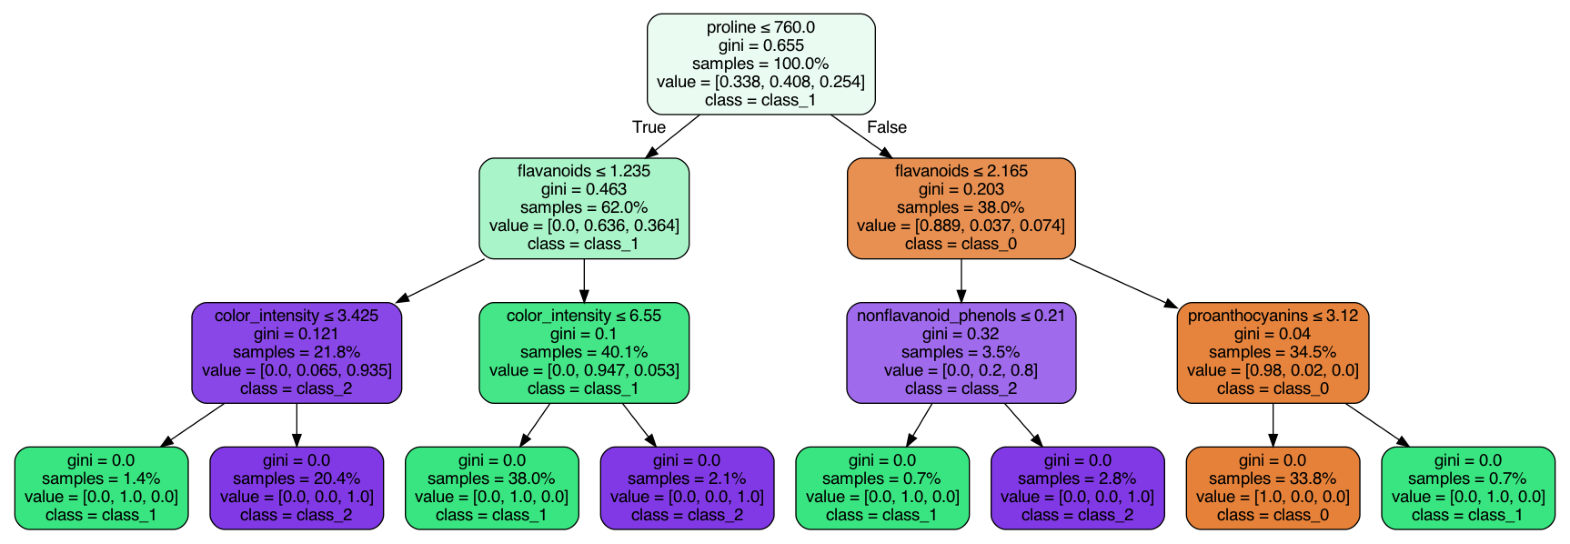

In [74]:
def draw_tree(tree, feature_names, class_names):
    dot_data = export_graphviz(tree,
                               out_file=None,
                               feature_names=feature_names,
                               class_names=class_names,
                               filled=True,
                               rounded=True,
                               special_characters=True,
                               proportion=True)
    
    graph = graphviz.Source(dot_data)
    graph.format = "png"
    graph.render("tree")

    plt.figure(figsize=(20, 15))
    img = mpimg.imread("tree.png")
    plt.imshow(img)
    plt.axis('off')  # Hide axes
    plt.show()

feature_names = wine.feature_names
class_names = wine.target_names
draw_tree(tree, feature_names, class_names)

### <font color='#eb3483'> Exercise 3 </font>

Try varying the max_depth parameter - what's the best depth you can find (try options on the range of 2 to 10)? Hint don't test one by one, automate the hyper-parameter tuning!

In [75]:
simple_tree = DecisionTreeClassifier(max_depth=2)

In [76]:
simple_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

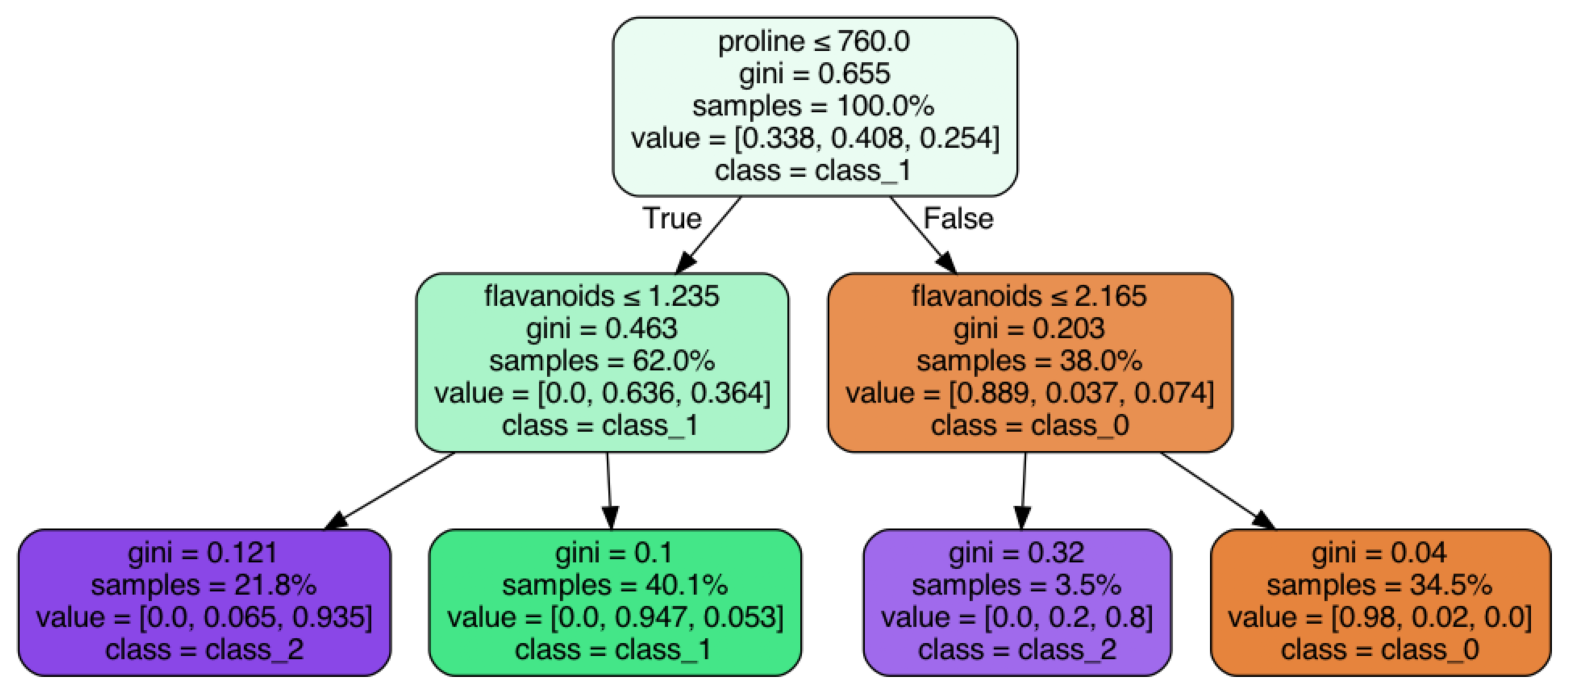

In [78]:
draw_tree(simple_tree,feature_names, class_names)

### <font color='#eb3483'> Exercise 4 </font>

What features are the most important in your model? Hint take a peak at the `feature_importances_` variable in decision tree objects and how we accessed it in the class notebook.

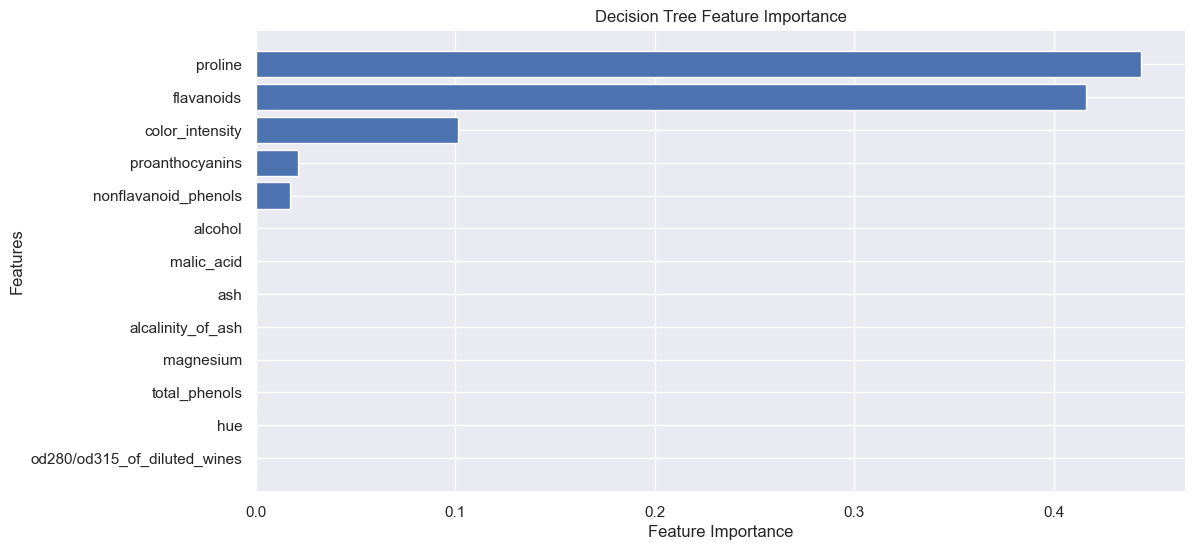

In [79]:
feature_importances = dict(zip(features, tree.feature_importances_))

# Sort the feature importances in descending order
sorted_feature_importances = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)

# Extract the features and their importances for plotting
features_sorted, importances_sorted = zip(*sorted_feature_importances)

# Create a bar chart
plt.figure(figsize=(12, 6))
plt.barh(range(len(importances_sorted)), importances_sorted, align='center')
plt.yticks(range(len(importances_sorted)), features_sorted)
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Decision Tree Feature Importance')
plt.gca().invert_yaxis()  # Invert y-axis to display most important features at the top
plt.show()